# Redes Neurais Convolucionais

#### Origem do Dataset

1. [Repositório Digipathos](https://www.digipathos-rep.cnptia.embrapa.br/jspui/handle/123456789/2)

# Links Úteis

1. [Doenças de Tomate - Embrapa](https://www.embrapa.br/busca-de-publicacoes/-/publicacao/1135499/doencas-do-tomateiro)

### Descriçao

---
1. O objetivo deste notebook é Redes Neurais Convolucionais.
2. Os dados para usar serão clonados do nosso próprio github, pela pasta dataset.
3. Vamos treinar nosso modelo para que ele aprenda a detectar doença em plantações de tomate.
---

### Dicionário


Class	                                                  | Type  	  |    Description                              | Link para mais informações |
----------------------------------------------------------|:---------:|:-------------------------------------------:|:---------------------------:|
virus_mosaico_do_tomate_Y  	  										  	  |Class     | O agente causal da risca-do-tomateiro (PVY) ocorre de forma restrita em lavoruas de tomate no Brasil. São poucas as plantas hospedeiras do vírus. A transmissão é feita por pulgões, que adquirem o vírus em uma planta doente.	                    | [Link](https://www.embrapa.br/agencia-de-informacao-tecnologica/cultivos/tomate/producao/doencas-e-pragas/doencas/virus/mosaico-do-virus-y) |
mancha_alvo														  |Class    | A mancha-alvo, causada pelo fungo Corynespora cassiicola, é uma das principais doenças da soja e uma grande ameaça à agricultura brasileira, uma vez que sua incidência vem aumentando nas últimas safras.                         | [Link](https://agriculture.basf.com/br/pt/conteudos/cultivos-e-sementes/soja/mancha-alvo-principais-sintomas.html) |
mancha_bacteriana		     										  |Class     | A mancha-bacteriana é uma bacteriose de importância econômica secundária para a cultura da berinjela, jiló, pimenta e tomate, porém causa grandes perdas na cultura do pimentão. Danos: A bactéria pode ocorrer em todos os estágios de desenvolvimento da planta.	                | [Link](https://www.agrolink.com.br/problemas/mancha-bacteriana_1666.html) |
virus_folha_amarela  | Class | A doença da folha amarela, uma das principais pragas da cana-de-açúcar no Brasil, é causada por um vírus resistente ao tratamento térmico transmitido pelo pulgão Melanaphis sacchari | [Link](https://www.agrolink.com.br/noticias/estudo-busca-resistencia-a-doenca-da-folha-amarela_457815.html) |
requeima  | Class | A requeima causa manchas encharcadas, grandes e escuras nas folhas e nas brotações jovens, evoluindo para uma "queima" ou "mela" geral da planta (Figura 1). Na face inferior da lesão observa-se um mofo pulverulento esbranquiçado, que é a esporulação do fungo. Nos frutos, a prodidão é dura, de coloração marrom-escura. | [Link](https://www.embrapa.br/agencia-de-informacao-tecnologica/cultivos/tomate/producao/doencas-e-pragas/doencas/fungo/requeima) |
enrolamento_de_folha | Class | O sintoma do enrolamento da folha pode ocorrer em plantas jovens produzidas sob cobertura e plantadas no campo durante os períodos úmidos. Geralmente é observado mais tarde, em plantas com pelo menos 3 buquês e no período de verão. | [Link](http://ephytia.inra.fr/pt/C/5334/Tomate-Enrolamento-Fisiologico-das-Folhas) |
pinta_preta | Class | A pinta preta, causada por Alteranaria solani, é uma das doenças mais importantes na cultura do tomate. Manejá-la exige a integração de medidas que incluem o uso de fungicidas aplicados preventivamente ou assim que aparecerem os primeiros sintomas. | [Link](https://revistacultivar.com.br/artigos/como-controlar-pinta-preta-no-tomateiro) |
acaros | Class | Costuma se alojar na face inferior de folíolos – onde deposita seus ovos – e brotos, na região apical da planta. Infesta qualquer estádio de desenvolvimento do tomateiro. Adultos e ninfas perfuram e sugam as células da epiderme vegetal. | [Link](https://agriculture.basf.com/br/pt/conteudos/cultivos-e-sementes/tomate/tipos-acaro.html) |
folhas_saudaveis   | Class | Saúde dos Tomates
mancha_septoria   | Class | A septoriose ou mancha-de-septoria é uma doença importante do tomateiro nas épocas de chuva, ocorrendo em quase todas as regiões produtoras do Brasil e do mundo (Jones et al., 1991; Kurozawa & Pavan, 1997; Zambolim et al., 2000). | [Link](https://ainfo.cnptia.embrapa.br/digital/bitstream/item/103062/1/cot-37.pdf)|



# Instalação de pacotes

In [2]:
!pip install pandas numpy keras opencv-python plotly scikit-learn keras tensorflow

# Obtendo o dataset

In [3]:
!git clone https://github.com/batestin1/coding_the_future_reconhecimento_de_pragas_com_redes_neurais.git clone #clona o repositorio
!mv clone/dataset /content/
!mv clone/modelos /content/models
!rm -rf clone
!rm -rf modelos
!rm -rf sample_data



Cloning into 'clone'...
remote: Enumerating objects: 10935, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 10935 (delta 19), reused 34 (delta 9), pack-reused 10890 (from 1)
Receiving objects: 100% (10935/10935), 186.73 MiB | 15.73 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Updating files: 100% (11011/11011), done.


# Bibliotecas

In [6]:
import numpy as np  # Biblioteca para manipulação de arrays e matrizes numéricas
import os  # Módulo para manipulação de diretórios e arquivos
import cv2  # OpenCV, usado para manipulação e processamento de imagens

# Importação de classes do Keras para criação de uma rede neural convolucional (CNN)
from keras.models import Sequential  # Para inicializar a rede neural sequencial
from keras.layers import Conv2D  # Camada convolucional para extração de características das imagens
from keras.layers import MaxPooling2D  # Camada de pooling para reduzir a dimensionalidade dos mapas de características
from keras.layers import Flatten  # Camada que transforma os mapas de características em um vetor unidimensional
from keras.layers import Dense  # Camada densa (totalmente conectada) para classificação
from keras.layers import Dropout  # Camada de dropout para reduzir overfitting
from keras.preprocessing import image  # Para carregar e processar imagens individuais para testes
from keras.layers import Rescaling  # Normalização dos valores dos pixels (RGB entre 0 e 1)

# Módulos do TensorFlow para pré-processamento e visualização da rede
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Geração de imagens aumentadas para treinamento
from tensorflow.keras.utils import plot_model  # Para visualizar a estrutura do modelo

# Para salvar e carregar modelos treinados
from keras.models import load_model

# Biblioteca para visualização gráfica das imagens
import matplotlib.pyplot as plt

# PIL (Pillow) para manipulação avançada de imagens, útil para modelos externos
from PIL import Image, ImageOps


# Conhecendo as imagens

array([[[118, 102, 120],
        [119, 103, 121],
        [121, 105, 123],
        ...,
        [102,  90, 108],
        [102,  90, 108],
        [102,  90, 108]],

       [[119, 103, 121],
        [120, 104, 122],
        [122, 106, 124],
        ...,
        [102,  90, 108],
        [101,  89, 107],
        [100,  88, 106]],

       [[120, 104, 122],
        [122, 106, 124],
        [123, 107, 125],
        ...,
        [101,  89, 107],
        [100,  88, 106],
        [100,  88, 106]],

       ...,

       [[159, 149, 166],
        [154, 144, 161],
        [150, 140, 157],
        ...,
        [144, 136, 153],
        [143, 135, 152],
        [136, 128, 145]],

       [[155, 145, 162],
        [155, 145, 162],
        [152, 142, 159],
        ...,
        [149, 141, 158],
        [152, 144, 161],
        [148, 140, 157]],

       [[148, 138, 155],
        [155, 145, 162],
        [157, 147, 164],
        ...,
        [140, 132, 149],
        [149, 141, 158],
        [151, 143, 160]]], dtype=uint8)
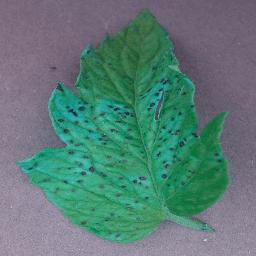

In [7]:
# Carrega a imagem do caminho especificado usando OpenCV
# cv2.imread lê a imagem e a armazena como um array NumPy
imagem = cv2.imread('/content/dataset/train/mancha_septoria/184031fe-22fe-479d-bb2d-9bb7122d60a9___Matt.S_CG 0881.JPG')

# Exibe o array da imagem carregada (não exibe visualmente, apenas mostra os valores da matriz)
imagem

In [8]:
# Retorna as dimensões da imagem carregada no formato (altura, largura, número de canais)
imagem.shape

(256, 256, 3)

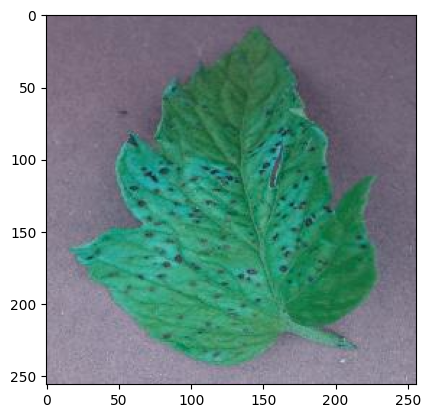

In [11]:
# Exibe a imagem carregada utilizando Matplotlib
plt.imshow(imagem)  # Exibe a imagem no formato BGR (padrão OpenCV)
plt.show()  # Mostra a imagem na saída gráfica

# Pre Processamento das Imagens e Análises dela

In [12]:
# Cria um objeto ImageDataGenerator para o pré-processamento de dados de treinamento,
# normalizando os valores dos pixels das imagens, dividindo por 255 para trazer os valores para o intervalo [0, 1]
train = ImageDataGenerator(rescale=1/255.0)  # Normaliza as imagens de 0 a 255 para 0 a 1

# Cria um objeto ImageDataGenerator para o pré-processamento de dados de teste,
# normalizando as imagens da mesma forma que o conjunto de treinamento
test = ImageDataGenerator(rescale=1/255.0)  # Normaliza as imagens de 0 a 255 para 0 a 1

In [13]:
# Exibe o objeto 'train', que contém a configuração do ImageDataGenerator
# Isso mostrará os detalhes do objeto, como os parâmetros de transformação aplicados às imagens
train

In [14]:
# Cria um gerador de dados para o conjunto de treinamento, lendo as imagens de um diretório
# As imagens serão redimensionadas para 256x256 pixels, organizadas em lotes (batch) de 32 e com as classes codificadas como categóricas (one-hot encoding)
conjunto_treino = train.flow_from_directory('/content/dataset/train',
                                            target_size=(256, 256),  # Redimensiona as imagens para 256x256 pixels
                                            batch_size=32,           # Define o tamanho do lote (batch) como 32 imagens por vez
                                            class_mode='categorical') # Define a codificação das classes como categórica (uma única classe por vez)

# Cria um gerador de dados para o conjunto de teste, com as mesmas configurações do conjunto de treinamento
conjunto_teste = test.flow_from_directory('/content/dataset/test',
                                          target_size=(256, 256),  # Redimensiona as imagens para 256x256 pixels
                                          batch_size=32,           # Define o tamanho do lote (batch) como 32 imagens por vez
                                          class_mode='categorical') # Define a codificação das classes como categórica (uma única classe por vez)


Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [15]:
# Exibe o dicionário contendo as classes e seus respectivos índices
# Isso permite visualizar a correspondência entre o nome das classes e os valores numéricos atribuídos a elas
conjunto_treino.class_indices

{'acaros_de_duas_manchas': 0,
 'enrolamento_de_folha': 1,
 'folhas_saudaveis': 2,
 'mancha_alvo': 3,
 'mancha_bacteriana': 4,
 'mancha_septoria': 5,
 'pinta_preta': 6,
 'requeima': 7,
 'virus_folha_amarela': 8,
 'virus_mosaico_do_tomate_Y': 9}

In [16]:
# Exibe o primeiro lote de imagens e rótulos do gerador de dados de treinamento
# Isso retorna um lote de imagens e seus rótulos correspondentes, com base no tamanho do lote definido (32 imagens por vez)
conjunto_treino[0]

(array([[[[0.70980394, 0.67058825, 0.6745098 ],
          [0.7254902 , 0.6862745 , 0.6901961 ],
          [0.7411765 , 0.7019608 , 0.7058824 ],
          ...,
          [0.6784314 , 0.63529414, 0.6509804 ],
          [0.65882355, 0.6156863 , 0.6313726 ],
          [0.7372549 , 0.69411767, 0.70980394]],
 
         [[0.7411765 , 0.7019608 , 0.7058824 ],
          [0.74509805, 0.7058824 , 0.70980394],
          [0.7254902 , 0.6862745 , 0.6901961 ],
          ...,
          [0.69803923, 0.654902  , 0.67058825],
          [0.6745098 , 0.6313726 , 0.64705884],
          [0.7294118 , 0.6862745 , 0.7019608 ]],
 
         [[0.74509805, 0.7058824 , 0.70980394],
          [0.7490196 , 0.70980394, 0.7137255 ],
          [0.73333335, 0.69411767, 0.69803923],
          ...,
          [0.70980394, 0.6666667 , 0.68235296],
          [0.69803923, 0.654902  , 0.67058825],
          [0.73333335, 0.6901961 , 0.7058824 ]],
 
         ...,
 
         [[0.5411765 , 0.48627454, 0.48627454],
          [0.44705

In [17]:
# Retorna o número de lotes (batches) que o gerador de dados de treinamento irá produzir durante o treinamento
# Isso é calculado dividindo o número total de imagens no conjunto de treinamento pelo tamanho do lote (batch_size)
len(conjunto_treino)

313

In [18]:
# Acessa a terceira imagem (índice 2) do primeiro lote de imagens carregado pelo gerador de dados de treinamento
# conjunto_treino[0] retorna o primeiro lote de imagens e rótulos
# [0][2] seleciona a terceira imagem do lote, onde '0' se refere às imagens e '2' é o índice da imagem
conjunto_treino[0][0][2]

array([[[0.49803925, 0.49803925, 0.4901961 ],
        [0.49803925, 0.49803925, 0.4901961 ],
        [0.49803925, 0.49803925, 0.4901961 ],
        ...,
        [0.60784316, 0.6156863 , 0.6117647 ],
        [0.6117647 , 0.61960787, 0.6156863 ],
        [0.6117647 , 0.61960787, 0.6156863 ]],

       [[0.49411768, 0.49411768, 0.48627454],
        [0.49411768, 0.49411768, 0.48627454],
        [0.5019608 , 0.5019608 , 0.49411768],
        ...,
        [0.6117647 , 0.61960787, 0.6156863 ],
        [0.6156863 , 0.62352943, 0.61960787],
        [0.6156863 , 0.62352943, 0.61960787]],

       [[0.49411768, 0.49411768, 0.48627454],
        [0.49803925, 0.49803925, 0.4901961 ],
        [0.5019608 , 0.5019608 , 0.49411768],
        ...,
        [0.6156863 , 0.62352943, 0.61960787],
        [0.61960787, 0.627451  , 0.62352943],
        [0.61960787, 0.627451  , 0.62352943]],

       ...,

       [[0.44705886, 0.44705886, 0.44705886],
        [0.44705886, 0.44705886, 0.44705886],
        [0.45098042, 0

In [19]:
# Acessa o rótulo (label) correspondente à terceira imagem (índice 2) do primeiro lote do conjunto de treinamento
# conjunto_treino[0] retorna o primeiro lote de imagens e rótulos
# [1][2] seleciona o rótulo da terceira imagem do lote
conjunto_treino[0][1][2]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [20]:
# Exibe o formato das imagens no conjunto de treinamento
# O atributo 'image_shape' retorna as dimensões das imagens, exceto o número de exemplos (batch size)
conjunto_treino.image_shape

(256, 256, 3)

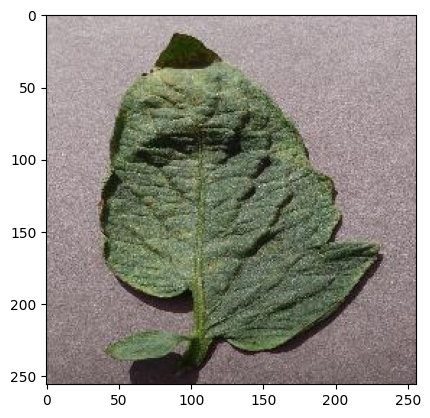

In [21]:
# Exibe a primeira imagem do primeiro lote de treinamento usando Matplotlib
# conjunto_treino[0][0][0] acessa a primeira imagem (índice 0) do primeiro lote de imagens carregado
plt.imshow(conjunto_treino[0][0][0])  # Exibe a imagem usando Matplotlib
plt.show()  # Mostra a imagem na saída gráfica

In [22]:
# Atribui à variável 'labels' uma lista contendo os nomes das classes extraídas do dicionário de índices de classe
# conjunto_treino.class_indices contém um mapeamento de classes para índices, onde as chaves são os nomes das classes
labels = [k for k in conjunto_treino.class_indices]  # Extrai os nomes das classes do dicionário de índices

# Exibe os nomes das classes
labels

['acaros_de_duas_manchas',
 'enrolamento_de_folha',
 'folhas_saudaveis',
 'mancha_alvo',
 'mancha_bacteriana',
 'mancha_septoria',
 'pinta_preta',
 'requeima',
 'virus_folha_amarela',
 'virus_mosaico_do_tomate_Y']

In [23]:
# Obtém a próxima amostra (lote) do gerador de dados de treinamento
# O método __next__() retorna o próximo lote de imagens e rótulos do gerador
amostra_de_treino = conjunto_treino.__next__()

In [24]:
# Extrai a matriz de imagens do lote de treinamento
# 'amostra_de_treino[0]' contém as imagens do lote, que são uma matriz NumPy
images = amostra_de_treino[0]  # A matriz de imagens (imagens do lote)

# Extrai a matriz de rótulos (classes) do lote de treinamento
# 'amostra_de_treino[1]' contém os rótulos (classes) das imagens, codificados como um vetor one-hot
nomes = amostra_de_treino[1]  # A matriz das classes (rótulos do lote)

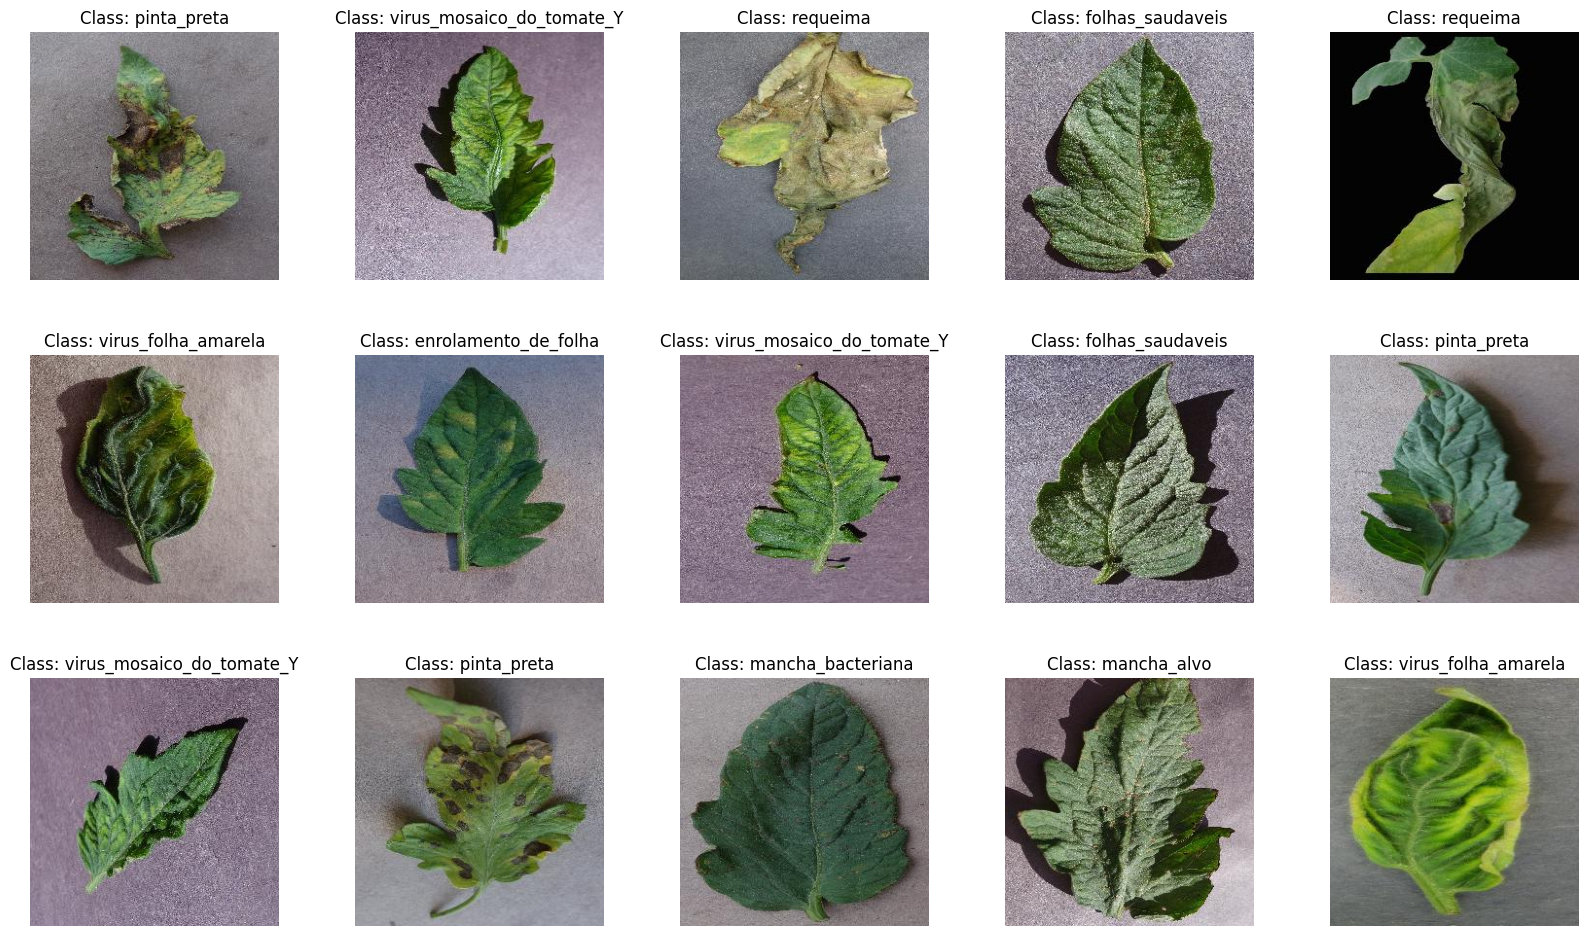

In [25]:
# Visualiza um conjunto de imagens em um grid usando subplots
# A figura tem tamanho 20x20 polegadas para acomodar as imagens com maior clareza

plt.figure(figsize=(20, 20))  # Define o tamanho da figura para o grid de imagens

# Loop para exibir as primeiras 15 imagens do lote de treinamento
for i in range(15):
    # Cria uma célula (subplot) para cada imagem no grid de 5x5 (ajustando a posição das imagens)
    plt.subplot(5, 5, i+1)  # 5x5 grid de subplots, ajustando a posição com 'i+1'
    plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Ajusta o espaço entre os subplots
    plt.imshow(images[i])  # Exibe a i-ésima imagem
    # Adiciona o título da imagem, que é a classe correspondente baseada no índice one-hot do rótulo
    plt.title(f'Class: {labels[np.argmax(nomes[i], axis=0)]}')  # O título mostra a classe com o maior valor no vetor one-hot
    plt.axis("off")  # Desliga os eixos para uma visualização mais limpa

# Construindo a CNN

In [26]:
# Inicializa um modelo sequencial vazio usando o Keras
# O modelo Sequential é usado para empilhar as camadas de maneira linear, uma após a outra
cnn = Sequential()

In [27]:
# Exibe a arquitetura atual do modelo 'cnn'
# Isso mostrará as camadas do modelo (no momento estará vazio, sem camadas adicionadas)
cnn

<Sequential name=sequential, built=False>

In [28]:
# Adiciona uma camada convolucional ao modelo
# Conv2D: camada de convolução 2D para detectar padrões nas imagens
# filters=32: define o número de filtros (detectores de características) na camada convolucional
# kernel_size=(3, 3): tamanho do filtro de convolução (3x3)
# activation='relu': função de ativação ReLU para introduzir não linearidade
# input_shape=[256, 256, 3]: define a forma de entrada das imagens (256x256 pixels e 3 canais de cor)
# name='Camada_Convolucional_1': nome dado à camada para fácil identificação
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=[256, 256, 3], name='Camada_Convolucional_1'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Adiciona uma camada de max pooling ao modelo
# MaxPooling2D: realiza o downsampling, reduzindo a dimensionalidade das imagens e mantendo as características mais importantes
# pool_size=(2, 2): define o tamanho da janela de pooling (2x2)
# strides=2: define o passo do pooling, ou seja, o quanto a janela de pooling se move em cada operação
# padding='valid': não adiciona zeros ao redor da imagem; o pooling será feito apenas nas áreas válidas
# name='Camada_MaxPooling_1': nome dado à camada para fácil identificação
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', name='Camada_MaxPooling_1'))

In [30]:
# Adiciona a segunda camada convolucional ao modelo
# Conv2D: camada de convolução 2D para detectar padrões mais complexos nas imagens
# filters=64: define o número de filtros para 64, dobrando o número de filtros da primeira camada
# kernel_size=(3, 3): tamanho do filtro de convolução (3x3)
# activation='relu': função de ativação ReLU para introduzir não linearidade
# name='Camada_Convolucional_2': nome dado à camada para fácil identificação
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='Camada_Convolucional_2'))

In [31]:
# Adiciona a segunda camada de max pooling ao modelo
# MaxPooling2D: reduz a dimensionalidade das imagens após a segunda camada convolucional
# pool_size=(2, 2): define o tamanho da janela de pooling (2x2)
# strides=2: define o passo do pooling, movendo a janela 2 posições por vez
# padding='valid': não adiciona preenchimento extra; o pooling será feito apenas nas áreas válidas
# name='Camada_MaxPooling_2': nome dado à camada para fácil identificação
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', name='Camada_MaxPooling_2'))

In [32]:
# Adiciona a camada de flattening ao modelo
# Flatten: transforma as saídas bidimensionais (altura x largura) da camada anterior em um vetor unidimensional
# Isso é necessário para conectar as camadas convolucionais e pooling com as camadas densas (fully connected)
# name='Camada_Flattening': nome dado à camada para fácil identificação
cnn.add(Flatten(name='Camada_Flattening'))

In [33]:
# Adiciona a camada totalmente conectada (fully connected) ao modelo
# Dense: camada densa, onde cada neurônio está conectado a todos os neurônios da camada anterior
# units=1024: número de neurônios na camada oculta (1024)
# activation='relu': função de ativação ReLU para introduzir não linearidade
# name='Camada_FullConnect': nome dado à camada para fácil identificação
cnn.add(Dense(units=1024, activation='relu', name='Camada_FullConnect'))

In [34]:
# Adiciona a camada de Dropout para prevenir overfitting
# Dropout: desativa aleatoriamente uma fração dos neurônios durante o treinamento para evitar o overfitting
# rate=0.5: taxa de dropout de 50%, ou seja, metade dos neurônios serão desativados a cada passo de treinamento
# name='Camada_de_Dropout': nome dado à camada para fácil identificação
cnn.add(Dropout(rate=0.5, name='Camada_de_Dropout'))

In [35]:
# Adiciona a camada de saída ao modelo
# Dense: camada totalmente conectada, com o número de neurônios igual ao número de classes (10)
# units=10: número de neurônios na camada de saída (10, pois estamos classificando em 10 classes)
# activation='softmax': função de ativação softmax para problemas de classificação multi-classe
# A função softmax normaliza a saída para representar probabilidades, fazendo com que a soma das saídas seja 1
# name='Camada_de_saida': nome dado à camada para fácil identificação
cnn.add(Dense(units=10, activation='softmax', name='Camada_de_saida'))

In [36]:
# Exibe um resumo da arquitetura do modelo
# O método 'summary' fornece detalhes sobre as camadas do modelo, incluindo:
# - Tipo de camada
# - Forma da saída de cada camada
# - Número de parâmetros treináveis e não treináveis em cada camada
# Essa informação ajuda a entender a estrutura do modelo e verificar se a arquitetura está configurada corretamente
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Camada_Convolucional_1 (Conv2D)      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Camada_MaxPooling_1 (MaxPooling2D)   │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Camada_Convolucional_2 (Conv2D)      │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Camada_MaxPooling_2 (MaxPooling2D)   │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Camada_Flattening (Flatten)          │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Camada_FullConnect (Dense)           │ (None, 1024)                │     251,921,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Camada_de_Dropout (Dropout)          │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Camada_de_saida (Dense)              │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 251,951,050 (961.12 MB)

 Trainable params: 251,951,050 (961.12 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Compila o modelo antes de treiná-lo
# O compilador configura o modelo para o processo de treinamento, especificando:
# - optimizer='adam': otimiza os pesos da rede usando o otimizador Adam, que é eficiente e popular para redes neurais
# - loss='binary_crossentropy': a função de perda usada para problemas de classificação binária (porém, no caso de múltiplas classes, pode-se usar 'categorical_crossentropy')
# - metrics=['accuracy']: a métrica usada para avaliar o desempenho do modelo durante o treinamento (neste caso, a acurácia)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
# Treina o modelo com os dados de treino
# cnn.fit: método para treinar o modelo com os dados de entrada
# x = conjunto_treino: especifica o gerador de dados (conjunto de treino) que será usado para alimentar o modelo
# epochs=10: define o número de épocas (iterações completas sobre o conjunto de dados) para o treinamento
cnn.fit(x = conjunto_treino, epochs = 10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 117ms/step - accuracy: 0.3697 - loss: 0.5452
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.7635 - loss: 0.1285
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.8639 - loss: 0.0833
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.9231 - loss: 0.0516
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.9585 - loss: 0.0339
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.9727 - loss: 0.0249
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.9787 - loss: 0.0207
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.9839 - loss: 0.0153
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.9899 - loss: 0.0129
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.9886 - loss: 0.0140


# Teste

In [39]:
# Faz previsões usando o modelo treinado
# cnn.predict: método para fazer previsões sobre novos dados (dados de teste)
# conjunto_teste: gerador de dados de teste, cujas imagens serão passadas para o modelo para previsão
resposta = cnn.predict(conjunto_teste)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step


In [40]:
# Avalia o desempenho do modelo com o conjunto de teste
# cnn.evaluate: método que calcula a perda e a precisão do modelo com base nos dados de teste
# conjunto_teste: gerador de dados de teste, usado para avaliar a capacidade de generalização do modelo
# Retorna a perda (loss) e as métricas de avaliação, como a acurácia (accuracy), que indicam o desempenho do modelo
cnn.evaluate(conjunto_teste)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.8305 - loss: 0.1448


[0.1465439349412918, 0.8299999833106995]

In [44]:
def predict_image(img_path):
  # Carrega a imagem e redimensiona para o tamanho necessário (256x256)
  # O tamanho da imagem deve ser o mesmo usado para o treinamento da rede neural
  img = image.load_img(img_path, target_size=(256, 256))
  # Converte a imagem para um array NumPy
  img_array = image.img_to_array(img)
  # Expande as dimensões da imagem para incluir o batch size (necessário para a entrada do modelo)
  img_array = np.expand_dims(img_array, axis=0)

  # Normaliza a imagem (valor entre 0 e 1, caso tenha sido usado esse processo durante o treinamento)
  img_array /= 255.0

  # Faz a previsão com o modelo treinado
  prediction = cnn.predict(img_array)

  # Obtém o índice da classe com a maior probabilidade (o valor mais alto)
  predicted_class = np.argmax(prediction, axis=1)[0]

  # Verifica o índice da classe e retorna a mensagem correspondente
  for keys, values in conjunto_treino.class_indices.items():
    if values == predicted_class:
      # Dependendo da classe prevista, retorna uma mensagem com o nome da doença e um link com informações
      if values == 0:
        return f"A imagem é referente a doenca de {keys.replace('_','').upper()} e o cuidado para tal você pode encontrar aqui: https://agriculture.basf.com/br/pt/conteudos/cultivos-e-sementes/tomate/tipos-acaro.html"
      if values == 1:
        return f"A imagem é referente a doenca de {keys.replace('_','').upper()} e o cuidado para tal você pode encontrar aqui: http://ephytia.inra.fr/pt/C/5334/Tomate-Enrolamento-Fisiologico-das-Folhas"
      if values == 2:
        return f"A imagem refere-se a uma folha saúdavel"
      if values == 3:
        return f"A imagem é referente a doenca de {keys.replace('_',' ').upper()} e o cuidado para tal você pode encontrar aqui: https://agriculture.basf.com/br/pt/conteudos/cultivos-e-sementes/soja/mancha-alvo-principais-sintomas.html"
      if values == 4:
        return f"A imagem é referente a doenca de {keys.replace('_',' ').upper()} e o cuidado para tal você pode encontrar aqui: https://www.agrolink.com.br/problemas/mancha-bacteriana_1666.html"
      if values == 5:
        return f"A imagem é referente a doenca de {keys.replace('_',' ').upper()} e o cuidado para tal você pode encontrar aqui: https://agriculture.basf.com/br/pt/conteudos/cultivos-e-sementes/tomate/saiba-mais-sobre-a-septoriose-na-cultura-do-tomate-e-manejo.html"
      if values == 6:
        return f"A imagem é referente a doenca de {keys.replace('_',' ').upper()} e o cuidado para tal você pode encontrar aqui: https://revistacultivar.com.br/artigos/como-controlar-pinta-preta-no-tomateiro"
      if values == 7:
        return f"A imagem é referente a doenca de {keys.replace('_',' ').upper()} e o cuidado para tal você pode encontrar aqui: https://revistacultivar.com.br/artigos/manejo-de-requeima-em-tomate"
      if values == 8:
        return f"A imagem é referente a doenca de {keys.replace('_',' ').upper()} e o cuidado para tal você pode encontrar aqui: https://plantix.net/pt/library/plant-diseases/200036/tomato-yellow-leaf-curl-virus/"
      if values == 9:
        return f"A imagem é referente a doenca de {keys.replace('_',' ').upper()} e o cuidado para tal você pode encontrar aqui: https://www.embrapa.br/agencia-de-informacao-tecnologica/cultivos/tomate/producao/doencas-e-pragas/doencas/virus/mosaico-do-virus-y"


In [45]:
# Caminho da imagem para predição
img_path = '/content/dataset/test/mancha_bacteriana/0de30b71-8bd0-4270-a65b-7ae8befdd765___GCREC_Bact.Sp 6360.JPG'

# Chama a função predict_image para fazer a previsão e obter a resposta
predict_image(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


'A imagem é referente a doenca de MANCHA BACTERIANA e o cuidado para tal você pode encontrar aqui: https://www.agrolink.com.br/problemas/mancha-bacteriana_1666.html'

# Salvando o modelo

In [47]:
# Define o diretório onde o modelo será salvo
folder = 'models/cnn/'

# Verifica se o diretório existe. Se não existir, cria o diretório
if not os.path.exists(folder):
    os.makedirs(folder)

# Salva o modelo treinado no diretório especificado com o nome 'rede_neural_convolucional.h5'
cnn.save(os.path.join(folder, 'rede_neural_convolucional.h5'))
# Salva apenas os pesos do modelo, caso deseje salvar apenas os pesos
# cnn.save_weights(os.path.join(folder, 'rede_neural_convolucional.h5'))